# Face tracking pipeline

The following example illustrates how to use the `facenet_pytorch` python package to perform face detection and tracking on an image dataset using MTCNN.

In [ ]:
# !pip3 install --upgrade pip 
# !pip3 install mmcv
# !pip3 install ffmpeg-python

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

#### Determine if an nvidia GPU is available

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Define MTCNN module

Note that, since MTCNN is a collection of neural nets and other code, the device must be passed in the following way to enable copying of objects when needed internally.

See `help(MTCNN)` for more details.

In [11]:
mtcnn = MTCNN(keep_all=True, device=device)

#### Get a sample video

We begin by loading a video with some faces in it. The `mmcv` PyPI package by mmlabs is used to read the video frames (it can be installed with `pip install mmcv`). Frames are then converted to PIL images.

In [4]:
video = mmcv.VideoReader('trimmed.mp4')
frames = list()
# frames = [(idx, Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))) 
#           for frame in enumerate(video) if idx % 100 == 0]


for idx, frame in enumerate(video):
    if idx % 30 == 0:
        frames.append(Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))

print(len(frames))

# display.Video('trimmed.mp4', width=640)

50


#### Run video through MTCNN

We iterate through each frame, detect faces, and draw their bounding boxes on the video frames.

Tracking frame: 0


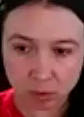

Tracking frame: 1


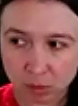

Tracking frame: 2


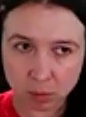

Tracking frame: 3


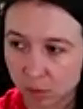

Tracking frame: 4


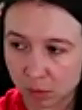

Tracking frame: 5


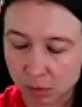

Tracking frame: 6


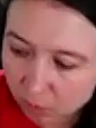

Tracking frame: 7


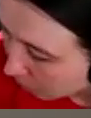

Tracking frame: 8


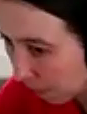

Tracking frame: 9


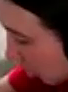

Tracking frame: 10


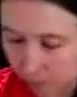

Tracking frame: 11


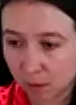

Tracking frame: 12


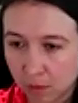

Tracking frame: 13


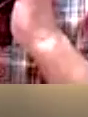

Tracking frame: 14


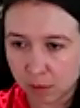

Tracking frame: 15


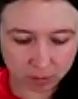

Tracking frame: 16


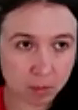

Tracking frame: 17


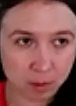

Tracking frame: 18


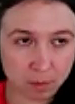

Tracking frame: 19


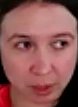

Tracking frame: 20


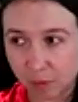

Tracking frame: 21


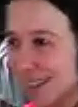

Tracking frame: 22


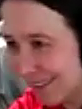

Tracking frame: 23


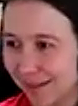

Tracking frame: 24


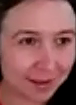

Tracking frame: 25


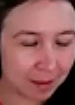

Tracking frame: 26


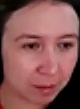

Tracking frame: 27


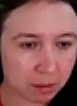

Tracking frame: 28


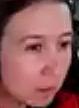

Tracking frame: 29


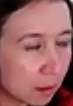

Tracking frame: 30


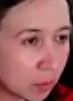

Tracking frame: 31


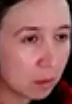

Tracking frame: 32


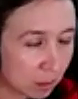

Tracking frame: 33


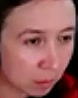

Tracking frame: 34


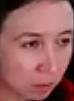

Tracking frame: 35


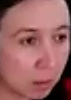

Tracking frame: 36


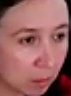

Tracking frame: 37


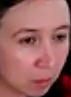

Tracking frame: 38


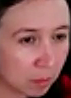

Tracking frame: 39


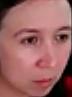

Tracking frame: 40


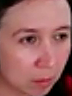

Tracking frame: 41


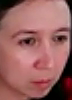

Tracking frame: 42


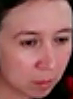

Tracking frame: 43


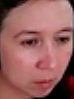

Tracking frame: 44


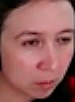

Tracking frame: 45


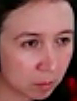

Tracking frame: 46


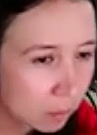

Tracking frame: 47


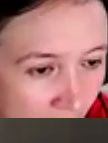

Tracking frame: 48


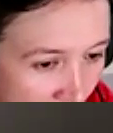

Tracking frame: 49


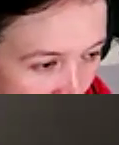


Done


In [10]:
frames_tracked = []
for idx_frame, frame in enumerate(frames):
    print(f'Tracking frame: {idx_frame}')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    for idx_box, box in enumerate(boxes):
        cropped_img = frame.crop(box)
        
        if idx_box == 3:
            display.display(cropped_img, display_id=True)
            cropped_img.save(f'./{idx_box}/{idx_frame}.jpg')
        
    
#     # Draw faces
#     frame_draw = frame.copy()
#     draw = ImageDraw.Draw(frame_draw)
#     for box in boxes:
#         draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
#     # Add to frame list
#     frames_tracked.append(frame_draw.resize((1280, 720), Image.BILINEAR))
print('\nDone')

#### Display detections

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### Save tracked video

In [ ]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()